In [2]:
import pandas as pd
df = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv')
obj_list = df.columns[df.dtypes == 'object'].values.tolist()
for l in obj_list:
    df[l] = pd.to_numeric(df[l], errors='coerce')
df["defects"] = df["defects"].astype(int)
df.dropna(inplace=True)

[0.00726205 0.00405363 0.00410351 0.00603784 0.00370497 0.00379736
 0.00445246 0.00317873 0.00453888 0.00181687 0.00384901 0.00194218
 0.00403975 0.00268861 0.00547887 0.00211975 0.00289055 0.00296957
 0.00565644 0.00341383 0.00378938 0.91821577]


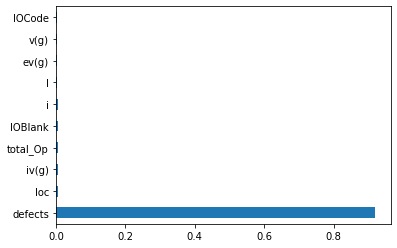

In [5]:
import pandas as pd
import numpy as np
data = pd.read_csv('/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv')
obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)
#data = data.drop('File', axis=1)
X = data.iloc[:,0:]  #independent columns
y = data.iloc[:,-1]    #target column i.e Realbug
from sklearn.ensemble import ExtraTreesClassifier
import matplotlib.pyplot as plt
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) #use inbuilt class feature_importances of tree based classifiers
#plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [6]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [7]:
X_test

,lOCode,v(g),ev(g),i,l
3133,12,2.0,1.0,21.59,0.23
5785,2,1.0,1.0,11.10,0.20
7458,4,2.0,1.0,20.00,0.14
8952,0,1.0,1.0,0.00,0.00
10240,31,8.0,6.0,24.56,0.05
...,...,...,...,...,...
5526,2,1.0,1.0,9.00,0.33
7416,60,6.0,5.0,51.33,0.03
7244,25,11.0,6.0,32.81,0.04
8302,55,11.0,1.0,31.27,0.03


In [8]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [9]:
y_test.value_counts()

0    2622
1     644
Name: defects, dtype: int64

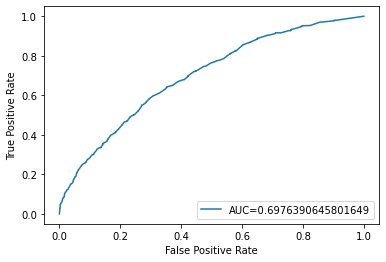

In [10]:
from sklearn import metrics
y_pred_proba = our_rf_model.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)

#create ROC curve
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

## LIME

In [123]:
!pip install scikit-plot

In [11]:
X_test.iloc[0, : ]

lOCode    12.00
v(g)       2.00
ev(g)      1.00
i         21.59
l          0.23
Name: 3133, dtype: float64

In [13]:
X_test

,lOCode,v(g),ev(g),i,l
3133,12,2.0,1.0,21.59,0.23
5785,2,1.0,1.0,11.10,0.20
7458,4,2.0,1.0,20.00,0.14
8952,0,1.0,1.0,0.00,0.00
10240,31,8.0,6.0,24.56,0.05
...,...,...,...,...,...
5526,2,1.0,1.0,9.00,0.33
7416,60,6.0,5.0,51.33,0.03
7244,25,11.0,6.0,32.81,0.04
8302,55,11.0,1.0,31.27,0.03


In [14]:
X_test.index.values.tolist().index(0)

1601

In [21]:
# Import for LIME
import lime
import lime.lime_tabular

file_to_be_explained = 0

print(f'Explaining {file_to_be_explained} with LIME')

Explaining 0 with LIME


In [22]:
# LIME Step 1 - Construct an explainer
our_lime_explainer = lime.lime_tabular.LimeTabularExplainer(
                            training_data = X_train.values,  
                            mode = 'classification',
                            training_labels = y_train,
                            feature_names = features,
                            class_names = class_labels,
                            discretize_continuous = True)
                            
# LIME Step 2 - Use the constructed explainer with the predict function 
# of your predictive model to explain any instance
lime_local_explanation_of_an_instance = our_lime_explainer.explain_instance(
                           # X_test[0],
                          # data_row = X_test.loc['FileName.py', : ], 
                            data_row = X_test.loc[file_to_be_explained, : ],
                            predict_fn = our_rf_model.predict_proba, 
                            num_features = 5,
                            top_labels = 1)

#explainer = lime_tabular.LimeTabularExplainer(X_train, mode = "regression", feature_names = boston_housing.feature_names)
#explanation = explainer.explain_instance(X_test[0], model.predict, num_features = len(boston_housing.feature_names))
                            
# Please use the code below to visualise the generated LIME explanation.
lime_local_explanation_of_an_instance.show_in_notebook()

/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/base.py:409: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  warnings.warn(


## SHAP

In [23]:
# Import libraries for SHAP
import subprocess
import sys
import importlib
import numpy
import shap

file_to_be_explained = 0
file_to_be_explained_idx = list(X_test.index).index(file_to_be_explained)

In [24]:
# explainer = shap.Explainer(our_rf_model, numpy.ascontiguousarray(X_train))
# shap_values = explainer(numpy.ascontiguousarray(X_test))

explainer = shap.Explainer(our_rf_model)
shap_values = explainer(X_test)

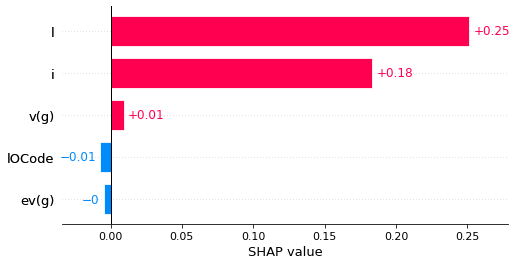

In [25]:
import matplotlib.pyplot as plt
shap.plots.bar(shap_values[file_to_be_explained_idx, :, 1], show=True)

## BreakDown

In [26]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [27]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train) 

RandomForestClassifier(random_state=0)

In [28]:
#necessary imports
from pyBreakDown.explainer import Explainer
from pyBreakDown.explanation import Explanation
#make explainer object
exp = Explainer(clf=our_rf_model, data= X_train, colnames=features)

In [29]:
#make explanation object that contains all information

explanation = exp.explain(observation=X_train.iloc[0,:].values,direction="up",useIntercept=True)

X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassifier was fitted with feature names
X does not have valid feature names, but RandomForestClassif

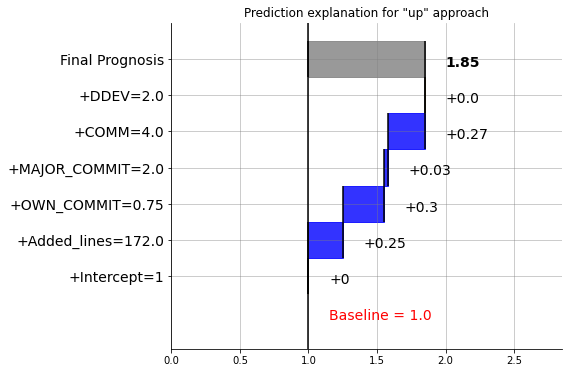

In [45]:
explanation.visualize()

## PyExplainer

In [30]:
## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

def train_test_split(df, frac=0.2):
    
    # get random sample 
    test = df.sample(frac=frac, axis=0)

    # get everything but the test sample
    train = df.drop(index=test.index)

    return train, test

class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [31]:
from sklearn.ensemble import RandomForestClassifier
rf_model = RandomForestClassifier(random_state=0)
rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [47]:
20 in X_test.index.values.tolist()

True

In [49]:
from pyexplainer.pyexplainer_pyexplainer import PyExplainer
file_to_be_explained = 0
import numpy as np
np.random.seed(0)

pyexp = PyExplainer(X_train = X_train,
                           y_train = y_train,
                           indep = X_train.columns,
                           dep = outcome,
                           blackbox_model = rf_model)

# PyExplainer Step 2 - Generate the rule-based explanation of an instance to be explained
exp_obj = pyexp.explain(X_explain = X_test.loc[file_to_be_explained,:].to_frame().transpose(),
                        y_explain = pd.Series(bool(y_test.loc[file_to_be_explained]), 
                                                      index = [file_to_be_explained],
                                                      name = outcome),
                        search_function = 'crossoverinterpolation',
                        max_iter=1000,
                        max_rules=20,
                        random_state=0,
                        reuse_local_model=True)

# Print rule 
exp_obj['top_k_positive_rules'][:1]

# Please use the code below to visualise the generated PyExplainer explanation (What-If interactive visualisation).
pyexp.visualise(exp_obj, title="Why this file is predicted as defect-introducing?")


set top_k_rules failed, top_k_rules should be int in range 1 - 15 (both included)
PyExplainer can not find rules to follow!
This could lead to blank explanation UI!
Please check whether the global model is properly trained with sufficient training data.
PyExplainer can not find rules to avoid!
This could lead to blank explanation UI!
Please check whether the global model is properly trained with sufficient training data.


/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/saumenduroy/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=2):
ABNORMAL_TERMINATION_IN_LNSRCH.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression

Output(layout=Layout(border='3px solid black'))

## PDP

In [53]:

## Load Data and preparing datasets

# Import for Load Data
from os import listdir
from os.path import isfile, join
import pandas as pd

# Import for Split Data into Training and Testing Samples
from sklearn.model_selection import train_test_split

data = pd.read_csv("/Users/saumenduroy/Documents/PhD Life/Explainability + SOAR/Explainers code/JM1_Single dataset and single file/Data/jm1.csv")
imp_features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l', 'defects']
data = data.loc[:, imp_features]

obj_list = data.columns[data.dtypes == 'object'].values.tolist()
for l in obj_list:
    data[l] = pd.to_numeric(data[l], errors='coerce')
data["defects"] = data["defects"].astype(int)
data.dropna(inplace=True)

outcome = 'defects'
features = ['lOCode', 'v(g)', 'ev(g)', 'i', 'l']

data[outcome] = pd.Categorical(data[outcome])
data[outcome] = data[outcome].cat.codes

X = data.iloc[:, :-1]
y = data.iloc[:, -1] 

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)



class_labels = ['Clean', 'Defective']
#class_labels = [0, 1]

X_train.columns = features
X_test.columns = features
training_data = pd.concat([X_train, y_train], axis=1)
testing_data = pd.concat([X_test, y_test], axis=1)

In [54]:
from sklearn.ensemble import RandomForestClassifier
our_rf_model = RandomForestClassifier(random_state=0)
our_rf_model.fit(X_train, y_train)  

RandomForestClassifier(random_state=0)

In [55]:
import numpy as np
import pandas as pd
# sklearn version: v1.0.1
from sklearn.model_selection import train_test_split
from sklearn.ensemble import (RandomForestClassifier, 
                              AdaBoostClassifier)
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import roc_auc_score
from sklearn.inspection import (partial_dependence, 
                                PartialDependenceDisplay)
import matplotlib.pyplot as plt
import seaborn as sns


file_to_be_explained = 0

print(f'Explaining {file_to_be_explained} with PDP')

Explaining 0 with PDP


## Average Value of lOCode

In [56]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [0], kind = 'average')

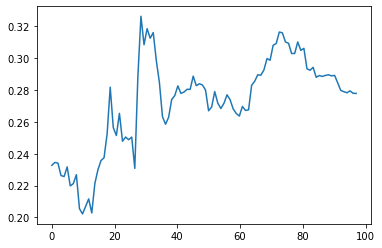

In [57]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of v(g)

In [58]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [1], kind = 'average')

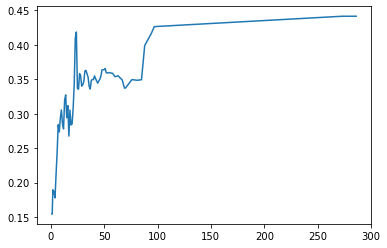

In [59]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of ev(g)

In [60]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [2], kind = 'average')

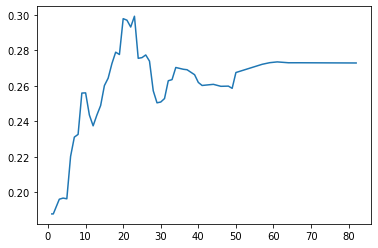

In [61]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of i

In [62]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [3], kind = 'average')

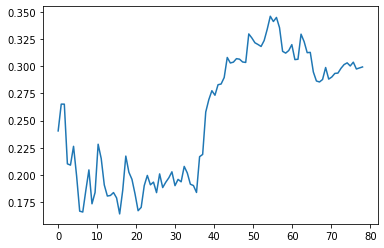

In [63]:
plt.plot(results['values'][0], results['average'][0])

## Average Value of l

In [64]:
from sklearn.inspection import partial_dependence
results = partial_dependence(our_rf_model, X_test, [4], kind = 'average')

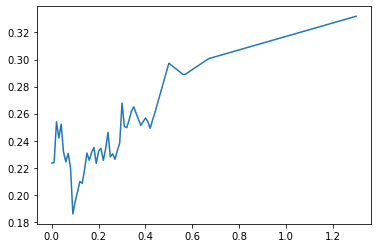

In [65]:
plt.plot(results['values'][0], results['average'][0])

## ICE

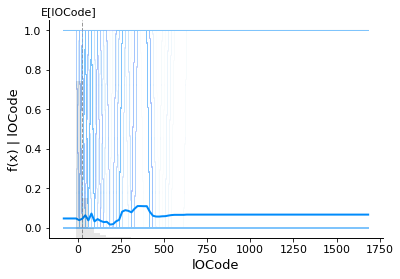

In [66]:
import subprocess
import sys
import importlib
import numpy
import shap

shap.plots.partial_dependence(
    "lOCode", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

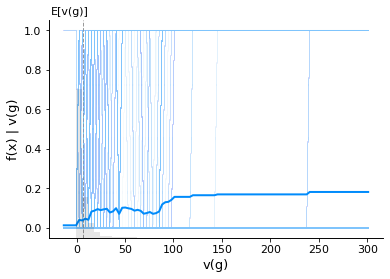

In [67]:
shap.plots.partial_dependence(
    "v(g)", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)


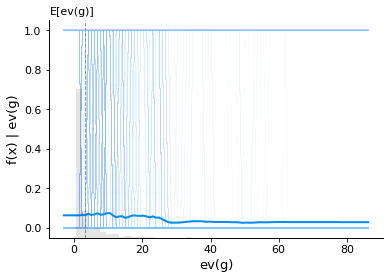

In [68]:
shap.plots.partial_dependence(
    "ev(g)", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

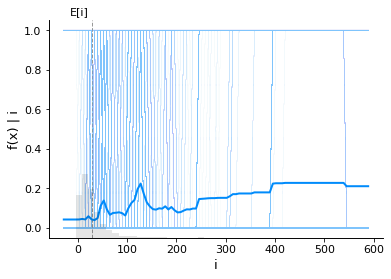

In [69]:
shap.plots.partial_dependence(
    "i", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)

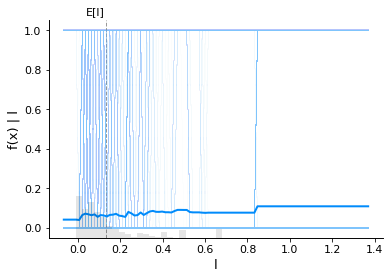

In [70]:
shap.plots.partial_dependence(
    "l", our_rf_model.predict, X_test, ice=True,
    feature_expected_value=True)